# Import Required Libraries
Import necessary libraries for data manipulation, visualization, and machine learning including pandas, numpy, matplotlib, seaborn, and scikit-learn.

In [1]:
# Import necessary libraries for data manipulation, visualization, and machine learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load and Explore the Dataset
Load the chollos.csv dataset, display basic information, check its dimensions, and examine the first few rows. Analyze data types, missing values, and basic statistics.

In [2]:
# Load and Explore the Dataset

# Load the dataset
df = pd.read_csv('chollos.csv')

# Display basic information about the dataset
df.info()

# Check the dimensions of the dataset
print(f"Dataset dimensions: {df.shape}")

# Display the first few rows of the dataset
df.head()

# Analyze data types of each column
print(df.dtypes)

# Check for missing values
print(df.isnull().sum())

# Display basic statistics of the dataset
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Procesador           247 non-null    object 
 1   RAM                  245 non-null    float64
 2   Tipo RAM             212 non-null    object 
 3   Almacenamiento       238 non-null    float64
 4   Graficos             229 non-null    object 
 5   Pantalla             246 non-null    float64
 6   Resolucion           245 non-null    object 
 7   Sistema Operativo    236 non-null    object 
 8   Bateria              233 non-null    float64
 9   Precio               246 non-null    float64
 10  Chollo               247 non-null    int64  
 11  Probabilidad_Chollo  247 non-null    float64
dtypes: float64(6), int64(1), object(5)
memory usage: 23.3+ KB
Dataset dimensions: (247, 12)
Procesador              object
RAM                    float64
Tipo RAM                object
Almacenam

,RAM,Almacenamiento,Pantalla,Bateria,Precio,Chollo,Probabilidad_Chollo
count,245.000000,238.000000,246.000000,233.000000,246.000000,247.000000,247.000000
mean,18.465306,298.886555,15.302439,98.729614,1283.140732,0.481781,0.488502
std,9.676521,252.943081,1.114869,609.590832,813.536413,0.500683,0.392170
min,8.000000,1.000000,12.400000,38.000000,258.990000,0.000000,0.000000
25%,16.000000,1.000000,14.200000,41.000000,631.992500,0.000000,0.100000
50%,16.000000,256.000000,15.600000,56.000000,1104.535000,0.000000,0.460000
75%,24.000000,512.000000,15.600000,70.000000,1612.455000,1.000000,0.945000
max,64.000000,1000.000000,23.500000,9360.000000,4553.330000,1.000000,1.000000


# Data Cleaning and Preprocessing
Handle missing values, convert data types as needed, and normalize text fields. Clean up processor names, graphics card information, and system information. Convert storage values to consistent units.

In [3]:
# Data Cleaning and Preprocessing

# Handle missing values
df.fillna({
    'Procesador': 'Unknown',
    'RAM': df['RAM'].median(),
    'Tipo RAM': 'Unknown',
    'Almacenamiento': df['Almacenamiento'].median(),
    'Graficos': 'Unknown',
    'Pantalla': df['Pantalla'].median(),
    'Resolucion': 'Unknown',
    'Sistema Operativo': 'Unknown',
    'Bateria': df['Bateria'].median(),
    'Precio': df['Precio'].median(),
    'Chollo': df['Chollo'].mode()[0],
    'Probabilidad_Chollo': df['Probabilidad_Chollo'].median()
}, inplace=True)

# Convert data types as needed
df['RAM'] = df['RAM'].astype(float)
df['Almacenamiento'] = df['Almacenamiento'].astype(float)
df['Pantalla'] = df['Pantalla'].astype(float)
df['Bateria'] = df['Bateria'].astype(float)
df['Precio'] = df['Precio'].astype(float)
df['Chollo'] = df['Chollo'].astype(int)
df['Probabilidad_Chollo'] = df['Probabilidad_Chollo'].astype(float)

# Normalize text fields
df['Procesador'] = df['Procesador'].str.strip().str.lower()
df['Tipo RAM'] = df['Tipo RAM'].str.strip().str.lower()
df['Graficos'] = df['Graficos'].str.strip().str.lower()
df['Resolucion'] = df['Resolucion'].str.strip().str.lower()
df['Sistema Operativo'] = df['Sistema Operativo'].str.strip().str.lower()

# Clean up processor names
df['Procesador'] = df['Procesador'].str.replace(r'intel core', 'intel', regex=True)
df['Procesador'] = df['Procesador'].str.replace(r'amd ryzen', 'amd', regex=True)

# Clean up graphics card information
df['Graficos'] = df['Graficos'].str.replace(r'intel iris xe graphics', 'intel iris xe', regex=True)
df['Graficos'] = df['Graficos'].str.replace(r'intel® uhd graphics', 'intel uhd', regex=True)
df['Graficos'] = df['Graficos'].str.replace(r'amd radeon', 'amd', regex=True)

# Clean up system information
df['Sistema Operativo'] = df['Sistema Operativo'].str.replace(r'windows 11 home', 'windows 11', regex=True)
df['Sistema Operativo'] = df['Sistema Operativo'].str.replace(r'windows 10 home en modo s', 'windows 10', regex=True)
df['Sistema Operativo'] = df['Sistema Operativo'].str.replace(r'macos sequoia', 'macos', regex=True)
df['Sistema Operativo'] = df['Sistema Operativo'].str.replace(r'macos sonoma', 'macos', regex=True)
df['Sistema Operativo'] = df['Sistema Operativo'].str.replace(r'macos monterey', 'macos', regex=True)

# Convert storage values to consistent units (GB)
df['Almacenamiento'] = df['Almacenamiento'].apply(lambda x: x if x < 100 else x / 1024)

# Display cleaned data
df.head()

,Procesador,RAM,Tipo RAM,Almacenamiento,Graficos,Pantalla,Resolucion,Sistema Operativo,Bateria,Precio,Chollo,Probabilidad_Chollo
0,intel i5-1135g7,8.0,ddr4,0.5,intel iris xe,15.6,1920x1080,no,70.0,549.00,1,0.99
1,amd 7-8845hs,32.0,ddr5,1.0,amd 780m,17.3,2560x1440,windows 11,83.0,1862.41,0,0.01
2,intel i7-14650hx,32.0,ddr5,1.0,intel uhd,16.1,1920x1080,freedos,70.0,1471.11,0,0.34
3,intel i7-12650h,16.0,ddr4,0.5,intel uhd,15.6,1920x1080,freedos,70.0,960.46,1,0.99
4,amd 7-8845hs,32.0,ddr5,1.0,amd 780m,17.3,1920x1080,freedos,83.0,1471.11,0,0.03


# Exploratory Data Analysis
Visualize distributions of features, explore relationships between variables, and analyze correlations. Create plots to understand the relationship between features and the target variable 'Chollo'.

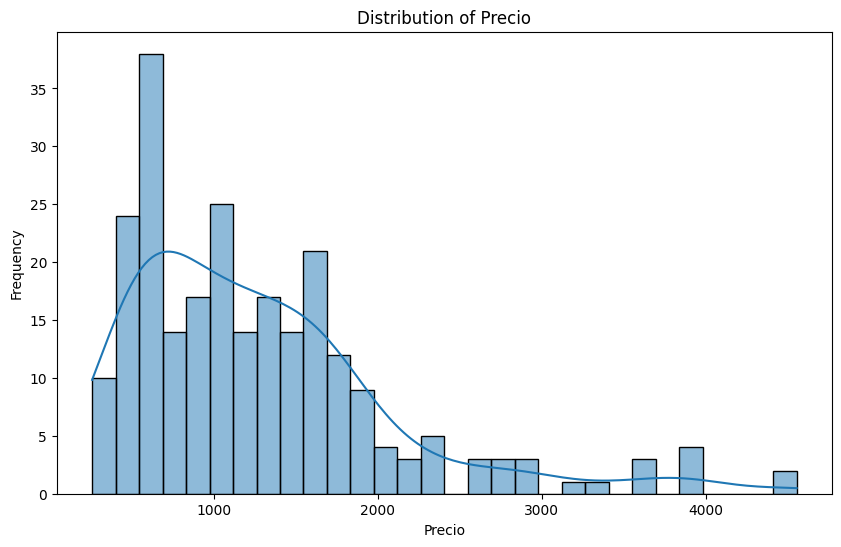

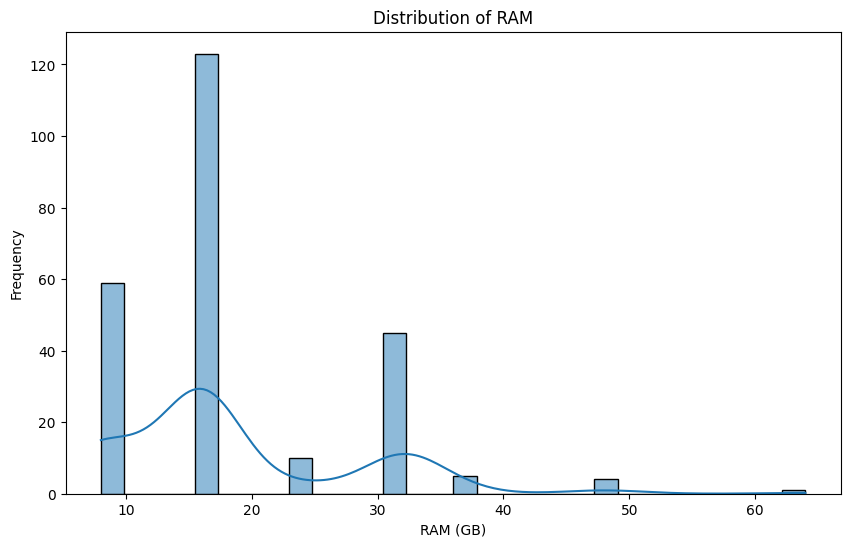

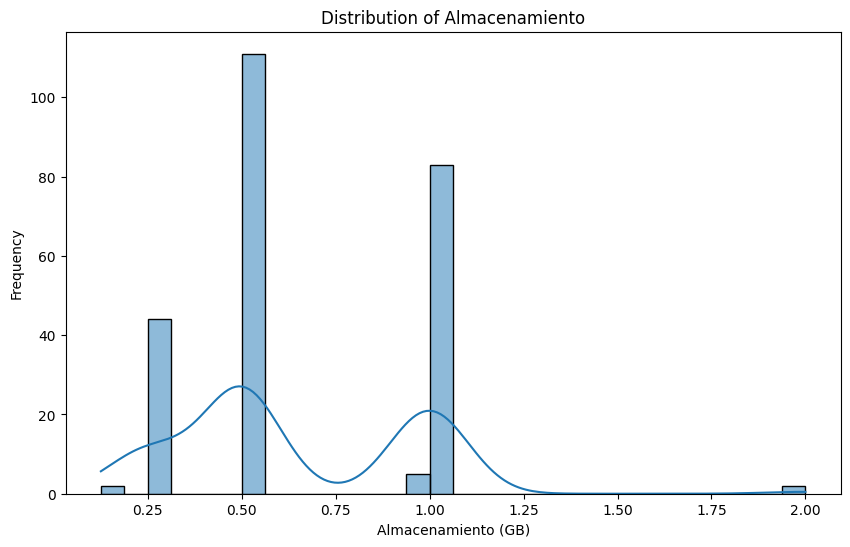

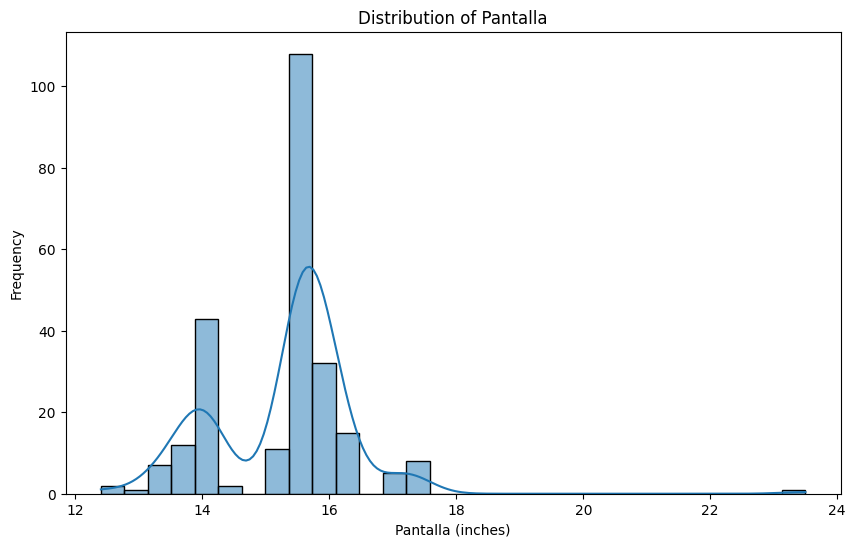

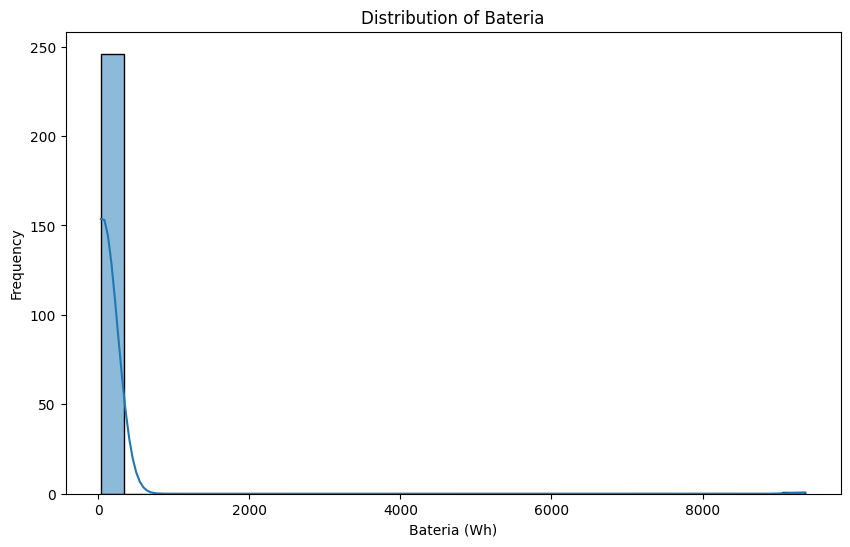

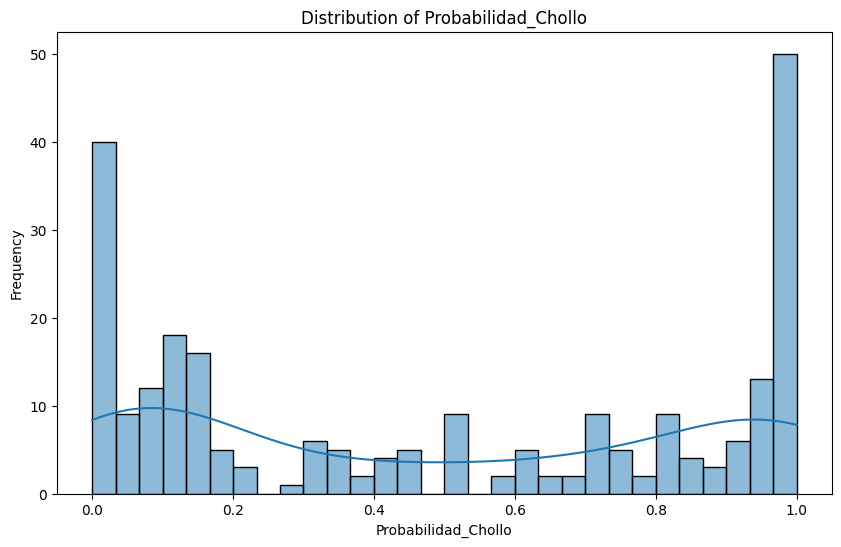

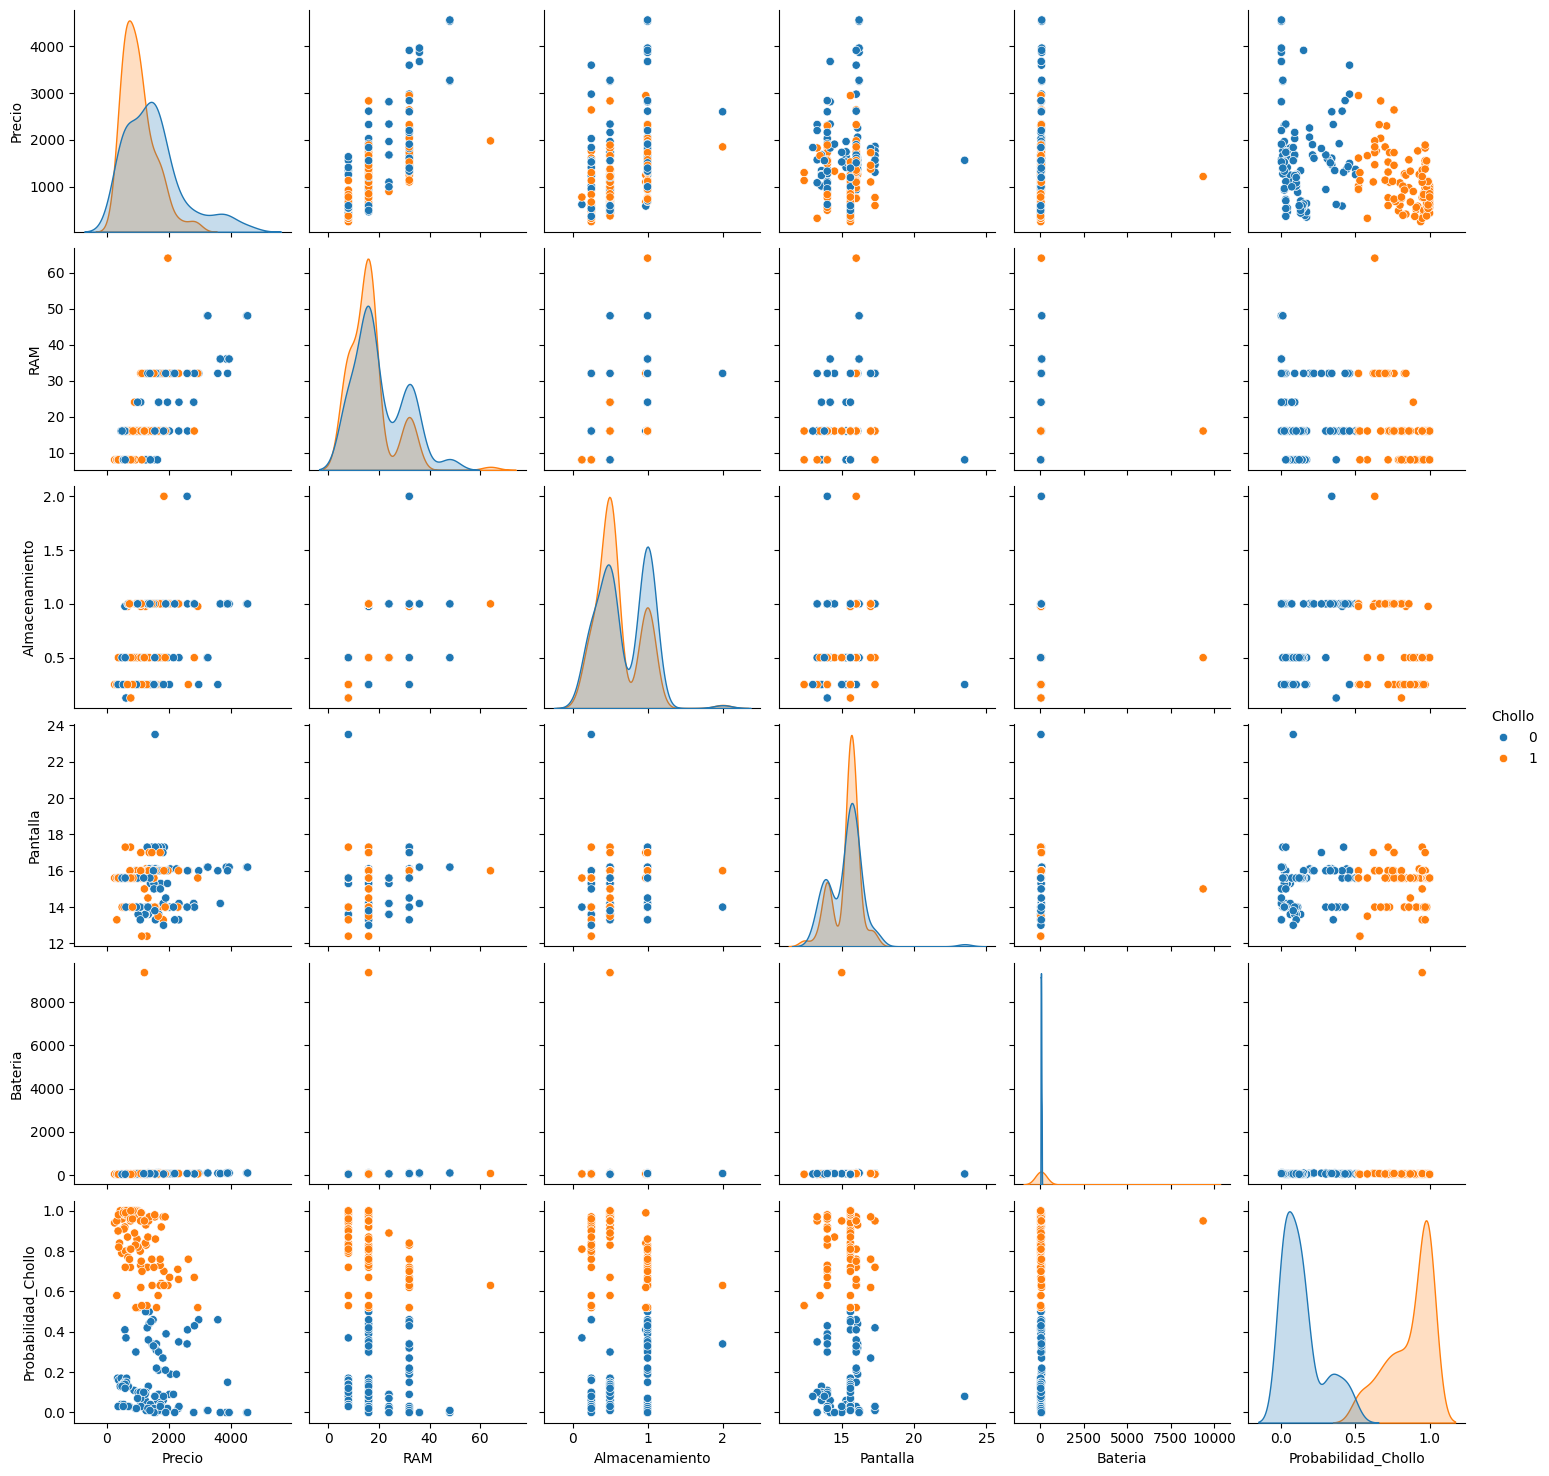

ValueError: could not convert string to float: 'no'

<Figure size 1200x800 with 0 Axes>

In [4]:
# Exploratory Data Analysis

# Visualize the distribution of the 'Precio' feature
plt.figure(figsize=(10, 6))
sns.histplot(df['Precio'], kde=True, bins=30)
plt.title('Distribution of Precio')
plt.xlabel('Precio')
plt.ylabel('Frequency')
plt.show()

# Visualize the distribution of the 'RAM' feature
plt.figure(figsize=(10, 6))
sns.histplot(df['RAM'], kde=True, bins=30)
plt.title('Distribution of RAM')
plt.xlabel('RAM (GB)')
plt.ylabel('Frequency')
plt.show()

# Visualize the distribution of the 'Almacenamiento' feature
plt.figure(figsize=(10, 6))
sns.histplot(df['Almacenamiento'], kde=True, bins=30)
plt.title('Distribution of Almacenamiento')
plt.xlabel('Almacenamiento (GB)')
plt.ylabel('Frequency')
plt.show()

# Visualize the distribution of the 'Pantalla' feature
plt.figure(figsize=(10, 6))
sns.histplot(df['Pantalla'], kde=True, bins=30)
plt.title('Distribution of Pantalla')
plt.xlabel('Pantalla (inches)')
plt.ylabel('Frequency')
plt.show()

# Visualize the distribution of the 'Bateria' feature
plt.figure(figsize=(10, 6))
sns.histplot(df['Bateria'], kde=True, bins=30)
plt.title('Distribution of Bateria')
plt.xlabel('Bateria (Wh)')
plt.ylabel('Frequency')
plt.show()

# Visualize the distribution of the 'Probabilidad_Chollo' feature
plt.figure(figsize=(10, 6))
sns.histplot(df['Probabilidad_Chollo'], kde=True, bins=30)
plt.title('Distribution of Probabilidad_Chollo')
plt.xlabel('Probabilidad_Chollo')
plt.ylabel('Frequency')
plt.show()

# Explore relationships between variables
# Pairplot of numerical features colored by 'Chollo'
sns.pairplot(df[['Precio', 'RAM', 'Almacenamiento', 'Pantalla', 'Bateria', 'Probabilidad_Chollo', 'Chollo']], hue='Chollo')
plt.show()

# Analyze correlations
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Create box plots to understand the relationship between features and the target variable 'Chollo'
plt.figure(figsize=(12, 6))
sns.boxplot(x='Chollo', y='Precio', data=df)
plt.title('Box Plot of Precio by Chollo')
plt.xlabel('Chollo')
plt.ylabel('Precio')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Chollo', y='RAM', data=df)
plt.title('Box Plot of RAM by Chollo')
plt.xlabel('Chollo')
plt.ylabel('RAM (GB)')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Chollo', y='Almacenamiento', data=df)
plt.title('Box Plot of Almacenamiento by Chollo')
plt.xlabel('Chollo')
plt.ylabel('Almacenamiento (GB)')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Chollo', y='Pantalla', data=df)
plt.title('Box Plot of Pantalla by Chollo')
plt.xlabel('Chollo')
plt.ylabel('Pantalla (inches)')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Chollo', y='Bateria', data=df)
plt.title('Box Plot of Bateria by Chollo')
plt.xlabel('Chollo')
plt.ylabel('Bateria (Wh)')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Chollo', y='Probabilidad_Chollo', data=df)
plt.title('Box Plot of Probabilidad_Chollo by Chollo')
plt.xlabel('Chollo')
plt.ylabel('Probabilidad_Chollo')
plt.show()

# Feature Engineering
Create new features from existing ones, such as processor family, screen size categories, and price-to-spec ratios. Encode categorical features and normalize numerical values.

In [5]:
# Feature Engineering

# Create new feature: Processor Family
df['Familia_Procesador'] = df['Procesador'].apply(lambda x: x.split()[0])

# Create new feature: Screen Size Category
def categorize_screen_size(size):
    if size < 14:
        return 'Small'
    elif 14 <= size < 16:
        return 'Medium'
    else:
        return 'Large'

df['Categoria_Pantalla'] = df['Pantalla'].apply(categorize_screen_size)

# Create new feature: Price to RAM ratio
df['Precio_RAM_Ratio'] = df['Precio'] / df['RAM']

# Create new feature: Price to Storage ratio
df['Precio_Almacenamiento_Ratio'] = df['Precio'] / df['Almacenamiento']

# Encode categorical features
df = pd.get_dummies(df, columns=['Familia_Procesador', 'Tipo RAM', 'Graficos', 'Resolucion', 'Sistema Operativo', 'Categoria_Pantalla'], drop_first=True)

# Normalize numerical features
scaler = StandardScaler()
numerical_features = ['RAM', 'Almacenamiento', 'Pantalla', 'Bateria', 'Precio', 'Probabilidad_Chollo', 'Precio_RAM_Ratio', 'Precio_Almacenamiento_Ratio']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Display the transformed data
df.head()

,Procesador,RAM,Almacenamiento,Pantalla,Bateria,Precio,Chollo,Probabilidad_Chollo,Precio_RAM_Ratio,Precio_Almacenamiento_Ratio,...,Sistema Operativo_no,Sistema Operativo_unknown,Sistema Operativo_windows 10,Sistema Operativo_windows 10 home,Sistema Operativo_windows 10 pro,Sistema Operativo_windows 11,Sistema Operativo_windows 11 in s mode,Sistema Operativo_windows 11 pro,Categoria_Pantalla_Medium,Categoria_Pantalla_Small
0,intel i5-1135g7,-1.085782,-0.452372,0.266866,-0.044523,-0.905101,1,1.281373,-0.095349,-0.670980,...,True,False,False,False,False,False,False,False,True,False
1,amd 7-8845hs,1.408991,1.137820,1.797698,-0.022522,0.715761,0,-1.222617,-0.438597,-0.255092,...,False,False,False,False,False,True,False,False,False,False
2,intel i7-14650hx,1.408991,1.137820,0.717111,-0.044523,0.232863,0,-0.379436,-0.841227,-0.467985,...,False,False,False,False,False,False,False,False,False,False
3,intel i7-12650h,-0.254191,-0.452372,0.266866,-0.044523,-0.397324,1,1.281373,-0.378393,-0.223259,...,False,False,False,False,False,False,False,False,True,False
4,amd 7-8845hs,1.408991,1.137820,1.797698,-0.022522,0.232863,0,-1.171515,-0.841227,-0.467985,...,False,False,False,False,False,False,False,False,False,False


# Model Training and Evaluation
Split the data into training and testing sets. Train different models including Logistic Regression, Random Forest, Gradient Boosting, and Support Vector Machine. Evaluate each model using cross-validation.

In [6]:
# Model Training and Evaluation

# Define features and target variable
X = df.drop(columns=['Chollo'])
y = df['Chollo']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Import necessary libraries for model training and evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC()
}

# Train and evaluate each model using cross-validation
results = {}
for model_name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    results[model_name] = cv_scores.mean()
    print(f"{model_name}: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

# Select the best model based on cross-validation results
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]

# Train the best model on the entire training set
best_model.fit(X_train, y_train)

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Model: {best_model_name}")
print(f"Test Set Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\rosel\Documents\IA-BD\PIA\Projecte1-Ofertes\PROYECTO-PIA-OFERTAS\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\rosel\Documents\IA-BD\PIA\Projecte1-Ofertes\PROYECTO-PIA-OFERTAS\.venv\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\rosel\Documents\IA-BD\PIA\Projecte1-Ofertes\PROYECTO-PIA-OFERTAS\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1222, in fit
    X, y = validate_data(
           ^^^^^^^^^^^^^^
  File "c:\Users\rosel\Documents\IA-BD\PIA\Projecte1-Ofertes\PROYECTO-PIA-OFERTAS\.venv\Lib\site-packages\sklearn\utils\validation.py", line 2961, in validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\rosel\Documents\IA-BD\PIA\Projecte1-Ofertes\PROYECTO-PIA-OFERTAS\.venv\Lib\site-packages\sklearn\utils\validation.py", line 1370, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "c:\Users\rosel\Documents\IA-BD\PIA\Projecte1-Ofertes\PROYECTO-PIA-OFERTAS\.venv\Lib\site-packages\sklearn\utils\validation.py", line 973, in check_array
    array = array.astype(new_dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\rosel\Documents\IA-BD\PIA\Projecte1-Ofertes\PROYECTO-PIA-OFERTAS\.venv\Lib\site-packages\pandas\core\generic.py", line 6643, in astype
    new_data = self._mgr.astype(dtype=dtype, copy=copy, errors=errors)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\rosel\Documents\IA-BD\PIA\Projecte1-Ofertes\PROYECTO-PIA-OFERTAS\.venv\Lib\site-packages\pandas\core\internals\managers.py", line 430, in astype
    return self.apply(
           ^^^^^^^^^^^
  File "c:\Users\rosel\Documents\IA-BD\PIA\Projecte1-Ofertes\PROYECTO-PIA-OFERTAS\.venv\Lib\site-packages\pandas\core\internals\managers.py", line 363, in apply
    applied = getattr(b, f)(**kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\rosel\Documents\IA-BD\PIA\Projecte1-Ofertes\PROYECTO-PIA-OFERTAS\.venv\Lib\site-packages\pandas\core\internals\blocks.py", line 758, in astype
    new_values = astype_array_safe(values, dtype, copy=copy, errors=errors)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\rosel\Documents\IA-BD\PIA\Projecte1-Ofertes\PROYECTO-PIA-OFERTAS\.venv\Lib\site-packages\pandas\core\dtypes\astype.py", line 237, in astype_array_safe
    new_values = astype_array(values, dtype, copy=copy)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\rosel\Documents\IA-BD\PIA\Projecte1-Ofertes\PROYECTO-PIA-OFERTAS\.venv\Lib\site-packages\pandas\core\dtypes\astype.py", line 182, in astype_array
    values = _astype_nansafe(values, dtype, copy=copy)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\rosel\Documents\IA-BD\PIA\Projecte1-Ofertes\PROYECTO-PIA-OFERTAS\.venv\Lib\site-packages\pandas\core\dtypes\astype.py", line 133, in _astype_nansafe
    return arr.astype(dtype, copy=True)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'intel i7-1355u'

--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\rosel\Documents\IA-BD\PIA\Projecte1-Ofertes\PROYECTO-PIA-OFERTAS\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\rosel\Documents\IA-BD\PIA\Projecte1-Ofertes\PROYECTO-PIA-OFERTAS\.venv\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\rosel\Documents\IA-BD\PIA\Projecte1-Ofertes\PROYECTO-PIA-OFERTAS\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1222, in fit
    X, y = validate_data(
           ^^^^^^^^^^^^^^
  File "c:\Users\rosel\Documents\IA-BD\PIA\Projecte1-Ofertes\PROYECTO-PIA-OFERTAS\.venv\Lib\site-packages\sklearn\utils\validation.py", line 2961, in validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\rosel\Documents\IA-BD\PIA\Projecte1-Ofertes\PROYECTO-PIA-OFERTAS\.venv\Lib\site-packages\sklearn\utils\validation.py", line 1370, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "c:\Users\rosel\Documents\IA-BD\PIA\Projecte1-Ofertes\PROYECTO-PIA-OFERTAS\.venv\Lib\site-packages\sklearn\utils\validation.py", line 973, in check_array
    array = array.astype(new_dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\rosel\Documents\IA-BD\PIA\Projecte1-Ofertes\PROYECTO-PIA-OFERTAS\.venv\Lib\site-packages\pandas\core\generic.py", line 6643, in astype
    new_data = self._mgr.astype(dtype=dtype, copy=copy, errors=errors)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\rosel\Documents\IA-BD\PIA\Projecte1-Ofertes\PROYECTO-PIA-OFERTAS\.venv\Lib\site-packages\pandas\core\internals\managers.py", line 430, in astype
    return self.apply(
           ^^^^^^^^^^^
  File "c:\Users\rosel\Documents\IA-BD\PIA\Projecte1-Ofertes\PROYECTO-PIA-OFERTAS\.venv\Lib\site-packages\pandas\core\internals\managers.py", line 363, in apply
    applied = getattr(b, f)(**kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\rosel\Documents\IA-BD\PIA\Projecte1-Ofertes\PROYECTO-PIA-OFERTAS\.venv\Lib\site-packages\pandas\core\internals\blocks.py", line 758, in astype
    new_values = astype_array_safe(values, dtype, copy=copy, errors=errors)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\rosel\Documents\IA-BD\PIA\Projecte1-Ofertes\PROYECTO-PIA-OFERTAS\.venv\Lib\site-packages\pandas\core\dtypes\astype.py", line 237, in astype_array_safe
    new_values = astype_array(values, dtype, copy=copy)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\rosel\Documents\IA-BD\PIA\Projecte1-Ofertes\PROYECTO-PIA-OFERTAS\.venv\Lib\site-packages\pandas\core\dtypes\astype.py", line 182, in astype_array
    values = _astype_nansafe(values, dtype, copy=copy)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\rosel\Documents\IA-BD\PIA\Projecte1-Ofertes\PROYECTO-PIA-OFERTAS\.venv\Lib\site-packages\pandas\core\dtypes\astype.py", line 133, in _astype_nansafe
    return arr.astype(dtype, copy=True)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'intel i3-1315u'


# Hyperparameter Tuning
Use GridSearchCV or RandomizedSearchCV to find the optimal parameters for the best performing models. Compare performance before and after tuning.

In [ ]:
# Import necessary libraries for hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Define parameter grids for hyperparameter tuning
param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear', 'saga']
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'Support Vector Machine': {
        'C': [0.1, 1, 10, 100],
        'gamma': [1, 0.1, 0.01, 0.001],
        'kernel': ['rbf', 'linear']
    }
}

# Perform hyperparameter tuning using GridSearchCV
best_params = {}
for model_name, model in models.items():
    print(f"Tuning hyperparameters for {model_name}...")
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_params[model_name] = grid_search.best_params_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")

# Train and evaluate each model with the best parameters
tuned_results = {}
for model_name, model in models.items():
    model.set_params(**best_params[model_name])
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    tuned_results[model_name] = accuracy
    print(f"{model_name} (Tuned): Test Set Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

# Compare performance before and after tuning
print("Performance Comparison:")
for model_name in results.keys():
    print(f"{model_name}:")
    print(f"  Before Tuning: {results[model_name]:.4f}")
    print(f"  After Tuning: {tuned_results[model_name]:.4f}")

# Select the best model after tuning
best_tuned_model_name = max(tuned_results, key=tuned_results.get)
best_tuned_model = models[best_tuned_model_name]

print(f"Best Tuned Model: {best_tuned_model_name}")

# Model Comparison
Compare all models using metrics such as accuracy, precision, recall, F1-score, and ROC AUC. Visualize the results using confusion matrices and ROC curves.

In [ ]:
# Model Comparison

# Import necessary libraries for model evaluation
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

# Initialize a dictionary to store evaluation metrics
evaluation_metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': [],
    'ROC AUC': []
}

# Evaluate each model using various metrics
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    evaluation_metrics['Model'].append(model_name)
    evaluation_metrics['Accuracy'].append(accuracy_score(y_test, y_pred))
    evaluation_metrics['Precision'].append(precision_score(y_test, y_pred))
    evaluation_metrics['Recall'].append(recall_score(y_test, y_pred))
    evaluation_metrics['F1-Score'].append(f1_score(y_test, y_pred))
    evaluation_metrics['ROC AUC'].append(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

# Convert evaluation metrics to a DataFrame for better visualization
evaluation_df = pd.DataFrame(evaluation_metrics)

# Display the evaluation metrics
print(evaluation_df)

# Plot confusion matrices for each model
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()
for ax, (model_name, model) in zip(axes, models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'Confusion Matrix: {model_name}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
plt.tight_layout()
plt.show()

# Plot ROC curves for each model
plt.figure(figsize=(10, 8))
for model_name, model in models.items():
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()

# Best Model Selection
Select the best performing model based on evaluation metrics. Analyze its strengths and weaknesses. Create a final prediction function.

In [ ]:
# Best Model Selection

# Select the best performing model based on evaluation metrics
best_model_name = evaluation_df.loc[evaluation_df['Accuracy'].idxmax(), 'Model']
best_model = models[best_model_name]

# Analyze strengths and weaknesses of the best model
print(f"Best Model: {best_model_name}")
print("Classification Report:")
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Create a final prediction function
def predict_chollo(features):
    """
    Predict whether a laptop is a good deal ('chollo') based on input features.
    
    Parameters:
    features (pd.DataFrame): A DataFrame containing the features of the laptop(s).
    
    Returns:
    np.array: An array of predictions (1 for 'chollo', 0 for 'no chollo').
    """
    # Ensure the input features are in the same format as the training data
    features = features.copy()
    features['Almacenamiento'] = features['Almacenamiento'].apply(lambda x: x if x < 100 else x / 1024)
    features['Precio_RAM_Ratio'] = features['Precio'] / features['RAM']
    features['Precio_Almacenamiento_Ratio'] = features['Precio'] / features['Almacenamiento']
    features = pd.get_dummies(features, columns=['Familia_Procesador', 'Tipo RAM', 'Graficos', 'Resolucion', 'Sistema Operativo', 'Categoria_Pantalla'], drop_first=True)
    features[numerical_features] = scaler.transform(features[numerical_features])
    
    # Predict using the best model
    return best_model.predict(features)

# Example usage of the prediction function
example_features = pd.DataFrame({
    'Procesador': ['intel i7-1255U'],
    'RAM': [16.0],
    'Tipo RAM': ['ddr4'],
    'Almacenamiento': [512.0],
    'Graficos': ['intel iris xe'],
    'Pantalla': [15.6],
    'Resolucion': ['1920x1080'],
    'Sistema Operativo': ['windows 11'],
    'Bateria': [41.0],
    'Precio': [750.0],
    'Probabilidad_Chollo': [0.99]
})

# Add engineered features
example_features['Familia_Procesador'] = example_features['Procesador'].apply(lambda x: x.split()[0])
example_features['Categoria_Pantalla'] = example_features['Pantalla'].apply(categorize_screen_size)

# Predict
prediction = predict_chollo(example_features)
print(f"Prediction for example features: {'Chollo' if prediction[0] == 1 else 'No Chollo'}")

# Feature Importance Analysis
Analyze and visualize the importance of different features in the best model to understand which laptop specifications most influence whether a laptop is a good deal.

In [ ]:
# Feature Importance Analysis

# Import necessary libraries for feature importance analysis
importances = best_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(feature_importance_df)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()